# Data Analysis

In [54]:
import pandas as pd
df = pd.read_csv('Results_280425.csv')

In [55]:
# Dropping unnecessary columns
df = df.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'DistributionChannel', 'UserLanguage', 'Consent form'])
df = df.drop(index=1)

In [56]:
# Combining the first two rows to form the column names
new_header = df.columns.astype(str) + '_' + df.iloc[0].astype(str)
df.columns = new_header

In [57]:
# Keep only rows where the answer is 'Yes'. The people that awnsered 'No' (or those that did not awnser at all), are not relevant for the study
df = df[df["Q0_Do you live in or frequently visit the city of Groningen?"] == "Yes"].reset_index(drop=True)

In [58]:
import re

# Extract only numbers from Q1
Q1 = "Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?"
df[Q1] = df[Q1].astype(str).apply(lambda x: re.search(r'\d+', x).group(0) if re.search(r'\d+', x) else None)
df[Q1] = pd.to_numeric(df[Q1], errors='coerce').astype('Int64')

In [59]:
df.head(5)

,ResponseId_Response ID,Q0_Do you live in or frequently visit the city of Groningen?,Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?,Q2_Do you think the municipality currently uses AI (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?,Q3_Do you think the municipality should use AI with its CCTV surveillance system?,Q4_Do you think there should be more or fewer CCTV surveillance cameras in the city centre of Groningen?,Q5_To what extent are you concerned about privacy related to CCTV surveillance cameras in Groningen?,Q6_Do you think CCTV surveillance cameras help improve safety in the city centre?,Q7_Do you feel safer knowing there are CCTV surveillance cameras installed when traveling outside?,Q8_Do you know how the data collected from the CCTV surveillance cameras is stored?,"Q9_All previous questions were about CCTV cameras with surveillance purposes, this question is about all municipality owned cameras. For what purpose do you think the municipality uses most cameras?",Q10_Which political party do you most align with? (Optional),Q16_Is there anything you would like to add about your opinion on CCTV surveillance? (Optional)
0,R_3ejZnMcSlH2zP5N,Yes,90,Probably not,Probably not,Somewhat more,Slightly concerned,Probably not,"Yes, definitely",Somewhat,Surveillance,GroenLinks - PVDA,Nee.
1,R_7ExUsiFwSR8ANWj,Yes,26,Probably not,Probably,Somewhat more,Slightly concerned,"Yes, definitely",Probably,Somewhat,Crowd size monitoring,GroenLinks - PVDA,-
2,R_1qaIoV3PhMZIGxr,Yes,12,"No, definitely not",Probably,Significantly fewer,Slightly concerned,Probably,"Yes, definitely","Yes, definitely",Bridge control,VVD,NaN
3,R_1uyYZZofVnEvmOS,Yes,10,"No, definitely not","No, definitely not",Significantly more,Not concerned at all,Probably,Probably,Not at all,Surveillance,Volt,NaN
4,R_2hI7UAnWaHZAXsd,Yes,14,Probably not,Probably,Significantly more,Not concerned at all,"Yes, definitely","Yes, definitely",Somewhat,Traffic,VVD,NaN


### The amount of cameras

In [60]:
Q1 = "Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?"

print(df[Q1].describe())

count          219.0
mean      322.671233
std      1099.507689
min              0.0
25%             20.0
50%             50.0
75%            150.0
max          10000.0
Name: Q1_How many CCTV cameras for surveillance do you think the municipality of Groningen currently owns?, dtype: Float64


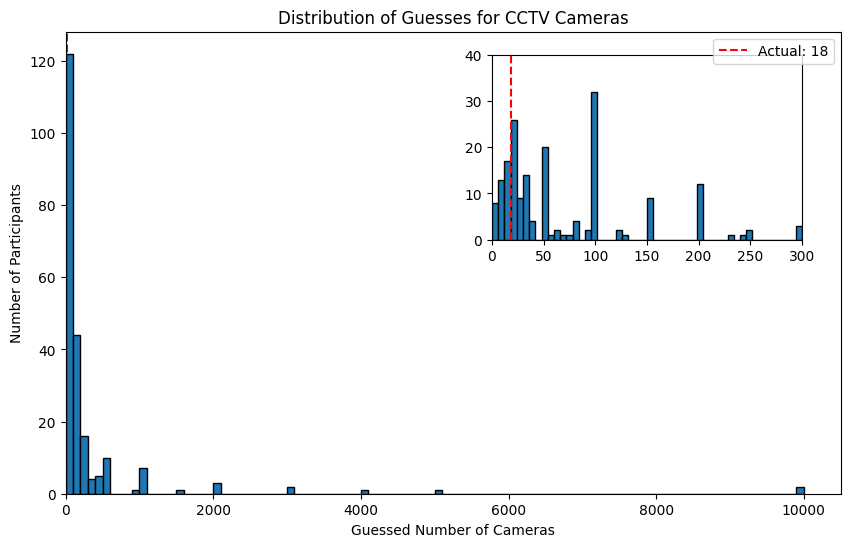

In [65]:
import matplotlib.pyplot as plt

# Drop NaN values from the specific column
df_nonan_Q1 = df[Q1].dropna()

# Create the main plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the full distribution (no clipping)
ax.hist(df_nonan_Q1, bins=100, edgecolor='black')

ax.axvline(x=18, color='red', linestyle='--', label='Actual: 18')

# Remove the white space before the main chart starts
ax.set_xlim(left=0)  # Ensure the x-axis starts from 0

# Title and labels
ax.set_title('Distribution of Guesses for CCTV Cameras')
ax.set_xlabel('Guessed Number of Cameras')
ax.set_ylabel('Number of Participants')
ax.legend()

# Create the inset for the zoomed-in view (clipping at 300)
df_clipped_Q1 = df_nonan_Q1[df_nonan_Q1 <= 300]

# Create inset axes and plot the zoomed-in histogram
x1, x2, y1, y2 = df_clipped_Q1.min(), df_clipped_Q1.max(), 0, 40  # Adjust as needed for zoom level
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4],  # Position and size of inset axes
                      xlim=(x1, x2), ylim=(y1, y2))  # Set limits for the inset axes
axins.hist(df_clipped_Q1, bins=50, edgecolor='black')

# Add a vertical line for the actual value (18) in the inset plot
axins.axvline(x=18, color='red', linestyle='--', label='Actual: 18')

plt.show()

In [62]:
# Count people who think the number of cameras is less than 18
less_than_18 = df_nonan_Q1[df_nonan_Q1 < 18]
count_less_than_18 = len(less_than_18)
percent_less_than_18 = (count_less_than_18 / len(df_nonan_Q1)) * 100

# Count people who think the number of cameras is exactly 18
exactly_18 = df_nonan_Q1[df_nonan_Q1 == 18]
count_exactly_18 = len(exactly_18)
percent_exactly_18 = (count_exactly_18 / len(df_nonan_Q1)) * 100

# Count people who think the number of cameras is more than 18
more_than_18 = df_nonan_Q1[df_nonan_Q1 > 18]
count_more_than_18 = len(more_than_18)
percent_more_than_18 = (count_more_than_18 / len(df_nonan_Q1)) * 100

# Print the results
print(len(df_nonan_Q1))
print(df_nonan_Q1.median())
print(f"People who think there are less than 18 cameras: {count_less_than_18} ({percent_less_than_18:.2f}%)")
print(f"People who think there are exactly 18 cameras: {count_exactly_18} ({percent_exactly_18:.2f}%)")
print(f"People who think there are more than 18 cameras: {count_more_than_18} ({percent_more_than_18:.2f}%)")

219
50.0
People who think there are less than 18 cameras: 38 (17.35%)
People who think there are exactly 18 cameras: 3 (1.37%)
People who think there are more than 18 cameras: 178 (81.28%)


In [76]:
Q4 = "Q4_Do you think there should be more or fewer CCTV surveillance cameras in the city centre of Groningen?"
df[Q4].unique()

array(['Somewhat more', 'Significantly fewer', 'Significantly more',
       'Not sure', 'About the same', 'Somewhat fewer'], dtype=object)

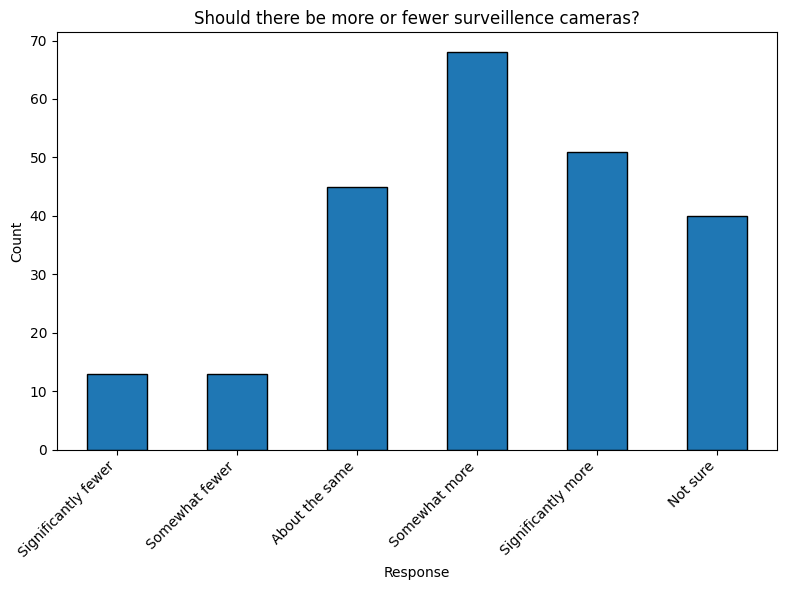

In [79]:
# Define the custom order for the responses
custom_order = ['Significantly fewer', 'Somewhat fewer', 'About the same', 'Somewhat more', 'Significantly more', 'Not sure']

# Convert the column to a categorical type with the defined order
df['Q4_MoreOrFewer'] = pd.Categorical(df[Q2], categories=custom_order, ordered=True)

# Get the value counts in the specified order
response_counts = df['Q4_MoreOrFewer'].value_counts().reindex(custom_order)

# Plotting the distribution as a bar chart
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar', edgecolor='black')
plt.title('Should there be more or fewer surveillence cameras?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### AI usage

In [63]:
Q2 = "Q2_Do you think the municipality currently uses AI  (for example for facial recognition or automated crime detection) with CCTV surveillance cameras?"
df[Q2].unique()

array(['Probably not', 'No, definitely not', 'Probably', 'I don’t know',
       'Yes, definitely'], dtype=object)

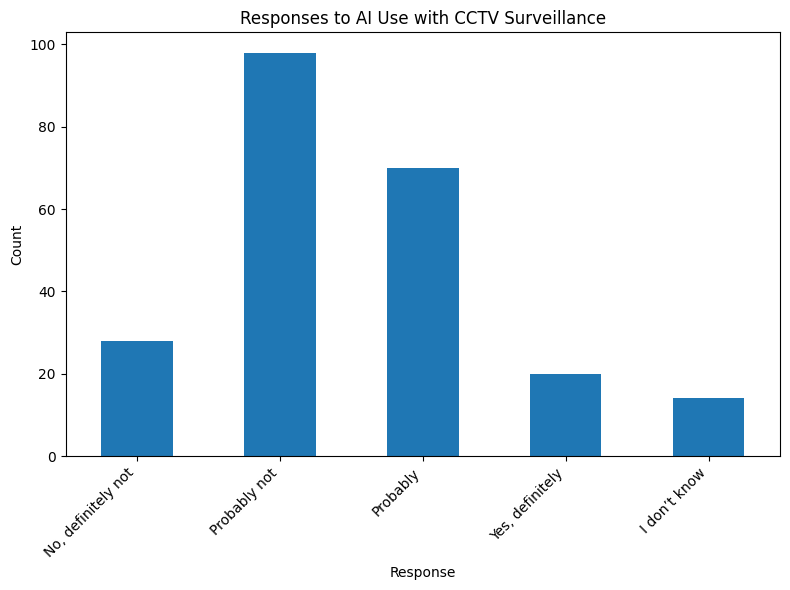

In [74]:
# Define the custom order for the responses
custom_order = ['No, definitely not', 'Probably not', 'Probably', 'Yes, definitely', 'I don’t know']

# Convert the column to a categorical type with the defined order
df['Q2_AI_Response'] = pd.Categorical(df[Q2], categories=custom_order, ordered=True)

# Get the value counts in the specified order
response_counts = df['Q2_AI_Response'].value_counts().reindex(custom_order)

# Plotting the distribution as a bar chart
plt.figure(figsize=(8, 6))
response_counts.plot(kind='bar')
plt.title('Responses to AI Use with CCTV Surveillance')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 16: Open question

In [64]:
Q16_values = df['Q16_Is there anything you would like to add about your opinion on CCTV surveillance? (Optional)'].dropna().tolist()
for value in Q16_values:
    print(value)
    print('\n')

Nee.


-


Personally I think CCTV surveillance is often seen as something negative in our western society, but if we look at societies in for example countries like South Korea where CCTV is standardized, we see that the camera's create a safe environment, and can be used in positive ways, to for example see who is behind a crime. If you have very few CCTV cameras I think it is easier to dismantle all of them as opposed to when there is more. I do have to say that you can go overboard with it and in my opinion it is not needed to have cameras at every street corner


Er is teveel geweld en rottigheid in de stad, cameras kunnen helpen. Preventief of om daders te pakken


I believe that we cannot start to rely on CCTV camera’s to do the job people are supposed to do.


Als je niks te verbergen hebt, heb je ook niets te vrezen!


Mogelijk goed om te weten voor de antwoorden ik werk bij de politie 


CCTV camera surveillance can in my opinion increase perceptions of safety and deter crime